In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy

In [2]:
data = pd.read_csv("\\Users\\piyus\\Documents\\DataSet\\Advertising\\Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.shape

(200, 5)

In [4]:
data1=data.drop(columns=['Unnamed: 0'],axis=1)
data1.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
data1.shape

(200, 4)

In [6]:
data1.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
data1.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
data1.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [9]:
#analizing inividual columns

data1.TV.describe()

count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64

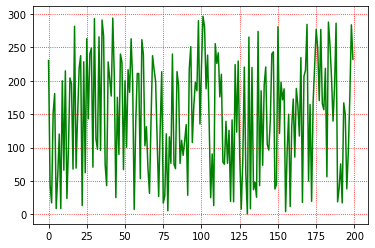

In [10]:
plt.plot(data1.TV,color='green')
plt.grid(color='red',linestyle='dotted')
plt.show()

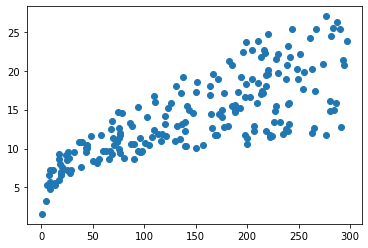

In [11]:
plt.scatter(data1.TV,data1.sales)

(array([26., 15., 21., 18., 19., 17., 22., 26., 20., 16.]),
 array([  0.7 ,  30.27,  59.84,  89.41, 118.98, 148.55, 178.12, 207.69,
        237.26, 266.83, 296.4 ]),
 <BarContainer object of 10 artists>)

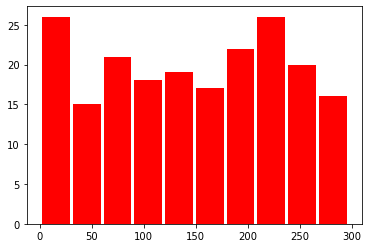

In [12]:
plt.hist(data1.TV,color='red',bins=10,rwidth=0.9)

C:\Users\piyus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TV'>

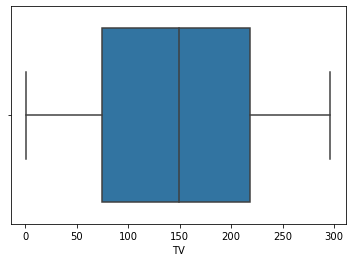

In [13]:
sns.boxplot(data1.TV)

In [14]:
#Radiao

data1.radio.describe()

count    200.000000
mean      23.264000
std       14.846809
min        0.000000
25%        9.975000
50%       22.900000
75%       36.525000
max       49.600000
Name: radio, dtype: float64

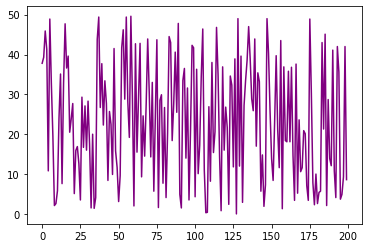

In [15]:
plt.plot(data1.radio,color='purple')

(array([30., 20., 21., 17., 18., 23., 14., 21., 21., 15.]),
 array([ 0.  ,  4.96,  9.92, 14.88, 19.84, 24.8 , 29.76, 34.72, 39.68,
        44.64, 49.6 ]),
 <BarContainer object of 10 artists>)

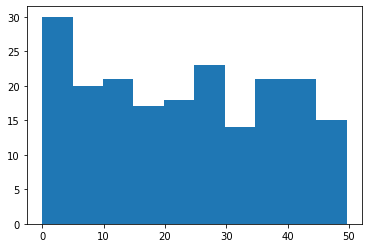

In [16]:
plt.hist(data1.radio)

C:\Users\piyus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='radio'>

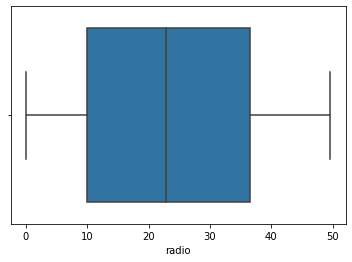

In [17]:
sns.boxplot(data1.radio)

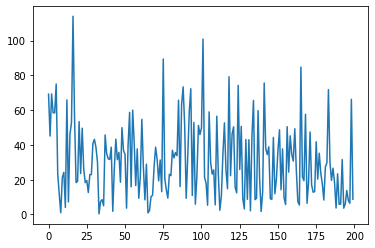

In [18]:
#newspaper

plt.plot(data1.newspaper)

C:\Users\piyus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newspaper'>

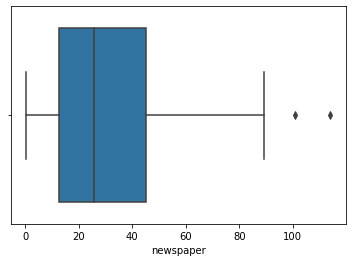

In [19]:
sns.boxplot(data1.newspaper)

In [20]:
data[data1.newspaper>80]

,Unnamed: 0,TV,radio,newspaper,sales
16,17,67.8,36.6,114.0,12.5
75,76,16.9,43.7,89.4,8.7
101,102,296.4,36.3,100.9,23.8
165,166,234.5,3.4,84.8,11.9


In [21]:
2/200

0.01

In [22]:
1/100*200

2.0

In [23]:
upper_lim=data1.newspaper.quantile(0.99)
upper_lim

89.5149999999999

In [24]:
data1[data1.newspaper>upper_lim]

,TV,radio,newspaper,sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [25]:
mid_val=data1.newspaper.median()

C:\Users\piyus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newspaper'>

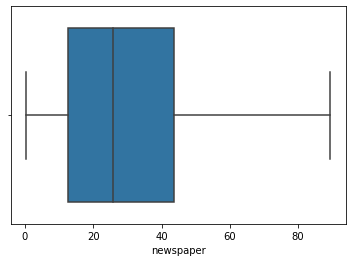

In [26]:
data1['newspaper'] = np.where(data1['newspaper']>upper_lim,mid_val,data1['newspaper'])
sns.boxplot(data1['newspaper'] )

In [27]:
#splitting data into X and Y
X=data1.drop(['sales'],axis=1)
Y=data1['sales']

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=30)
X_train.shape,y_train.shape,y_test.shape,X_test.shape

((160, 3), (160,), (40,), (40, 3))

In [29]:
from sklearn.linear_model import LinearRegression
model1= LinearRegression()
model1.fit(X_train,y_train)


LinearRegression()

In [30]:
model1.score(X_train,y_train)

0.8934184856874497

In [31]:
model1.score(X_test,y_test)

0.907390279919716

In [32]:
pred=model1.predict(X_test)

In [33]:
#Scaling the Data and checking Accuracy again

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scale_data = scale.fit_transform(data1)
scale_data[0:4,:]

array([[0.77578627, 0.76209677, 0.77328844, 0.80708661],
       [0.1481231 , 0.79233871, 0.50280584, 0.34645669],
       [0.0557998 , 0.92540323, 0.77441077, 0.30314961],
       [0.50997633, 0.83266129, 0.65319865, 0.66535433]])

In [34]:
X_scale=scale_data[:,0:3]
Y_scale=scale_data[:,3:]

In [35]:
X_train_s,X_test_s,y_train_s,y_test_s = train_test_split(X_scale,Y_scale,test_size=0.2,random_state=3)

In [36]:
model2 = LinearRegression()
model2.fit(X_train_s,y_train_s)
model2.score(X_train_s,y_train_s)

0.8930506231896195

In [37]:
model2.score(X_test_s,y_test_s)

0.9134960505313

In [38]:
#prediction on complete model
model2.fit(X,Y)
pred_all=model2.predict(X)

In [39]:
model2.score(X,Y)

0.8972134663527642

In [40]:
data1['Sales Prediction'] =pred_all 

In [41]:
data1.head()

,TV,radio,newspaper,sales,Sales Prediction
0,230.1,37.8,69.2,22.1,20.517073
1,44.5,39.3,45.1,10.4,12.335092
2,17.2,45.9,69.3,9.3,12.301248
3,151.5,41.3,58.5,18.5,17.592829
4,180.8,10.8,58.4,12.9,13.182902
